In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

# CIFR Dataset

In [107]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.cifar10.load_data()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [108]:
# visualization

def show_image(df,label,i):
    plt.imshow(df[i])
    plt.xlabel(labels[label[i][0]])
    plt.show()

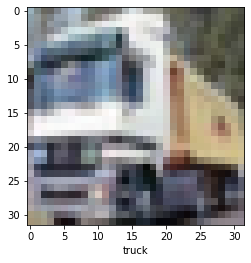

In [109]:
show_image(x_train,y_train,1)

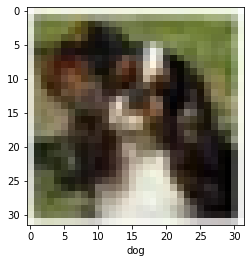

In [110]:
show_image(x_train,y_train,500)

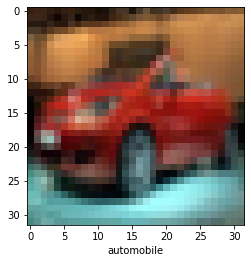

In [111]:
show_image(x_train,y_train,45)

In [28]:
# reshaping y_train and y_test

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [29]:
# Normalization of x_train and x_test

x_train = np.array(x_train)/255
x_test = np.array(x_test)/255

# ANN implementation ( without dropout )

In [31]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
ANN = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

ANN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

tb_callback_ann = keras.callbacks.TensorBoard(log_dir = './logs/CIFR10ANN')

In [49]:
ANN.fit(x_train,y_train,epochs=50,callbacks=tb_callback_ann)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9727 - accuracy: 0.2756
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7947 - accuracy: 0.3527
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7415 - accuracy: 0.3751
Epoch 4/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.7143 - accuracy: 0.3813
Epoch 5/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6933 - accuracy: 0.3908
Epoch 6/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6765 - accuracy: 0.3990
Epoch 7/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6671 - accuracy: 0.4014
Epoch 8/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6553 - accuracy: 0.4048
Epoch 9/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6488 - accuracy: 0.4085
Epoch 10/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.642

In [50]:
ANN.evaluate(x_test,y_test)

313/313 [==============================] - 0s 846us/step - loss: 1.6425 - accuracy: 0.4130


[1.6424520015716553, 0.4129999876022339]

In [59]:
y_pred = ANN.predict(x_test)
y_pred = np.array([np.argmax(i) for i in y_pred])

Text(51.0, 0.5, 'Y_true')

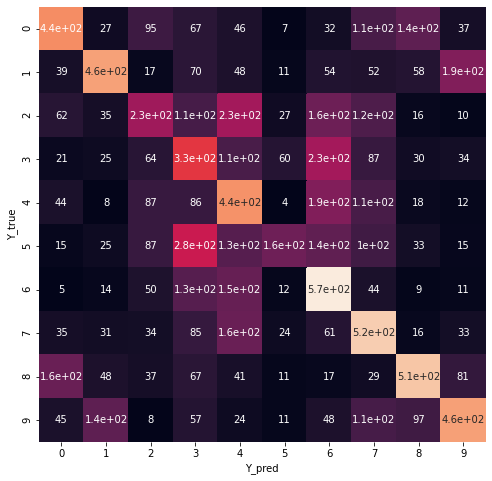

In [65]:
# confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False)
plt.xlabel('Y_pred')
plt.ylabel('Y_true')

In [66]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.44      0.47      1000
           1       0.57      0.46      0.51      1000
           2       0.32      0.23      0.27      1000
           3       0.26      0.33      0.29      1000
           4       0.32      0.44      0.37      1000
           5       0.50      0.16      0.25      1000
           6       0.38      0.57      0.45      1000
           7       0.41      0.52      0.46      1000
           8       0.55      0.51      0.53      1000
           9       0.52      0.46      0.49      1000

    accuracy                           0.41     10000
   macro avg       0.43      0.41      0.41     10000
weighted avg       0.43      0.41      0.41     10000



# ANN implementation with dropout

In [80]:
ANN_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

ANN_dropout.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

tb_callback_ann_dropout = keras.callbacks.TensorBoard(log_dir = './logs/CIFR10_ANN_dropout')

In [81]:
ANN_dropout.fit(x_test,y_test,epochs=150,callbacks=tb_callback_ann_dropout)

Epoch 1/150
313/313 [==============================] - 1s 2ms/step - loss: 2.2377 - accuracy: 0.1517
Epoch 2/150
313/313 [==============================] - 0s 2ms/step - loss: 2.1292 - accuracy: 0.1879
Epoch 3/150
313/313 [==============================] - 0s 2ms/step - loss: 2.0783 - accuracy: 0.2139
Epoch 4/150
313/313 [==============================] - 1s 2ms/step - loss: 2.0488 - accuracy: 0.2302
Epoch 5/150
313/313 [==============================] - 1s 2ms/step - loss: 2.0305 - accuracy: 0.2361
Epoch 6/150
313/313 [==============================] - 1s 2ms/step - loss: 2.0230 - accuracy: 0.2400
Epoch 7/150
313/313 [==============================] - 1s 2ms/step - loss: 2.0016 - accuracy: 0.2438
Epoch 8/150
313/313 [==============================] - 1s 2ms/step - loss: 1.9991 - accuracy: 0.2485
Epoch 9/150
313/313 [==============================] - 1s 2ms/step - loss: 1.9882 - accuracy: 0.2555
Epoch 10/150
313/313 [==============================] - 1s 2ms/step - loss: 1.9830 - accura

313/313 [==============================] - 1s 4ms/step - loss: 1.8780 - accuracy: 0.3030
Epoch 79/150
313/313 [==============================] - 2s 6ms/step - loss: 1.8849 - accuracy: 0.3040
Epoch 80/150
313/313 [==============================] - 2s 6ms/step - loss: 1.8937 - accuracy: 0.2993
Epoch 81/150
313/313 [==============================] - 1s 5ms/step - loss: 1.8824 - accuracy: 0.3027
Epoch 82/150
313/313 [==============================] - 2s 5ms/step - loss: 1.8840 - accuracy: 0.3003
Epoch 83/150
313/313 [==============================] - 1s 3ms/step - loss: 1.8725 - accuracy: 0.3040
Epoch 84/150
313/313 [==============================] - 1s 4ms/step - loss: 1.8823 - accuracy: 0.2995
Epoch 85/150
313/313 [==============================] - 1s 3ms/step - loss: 1.8795 - accuracy: 0.3054
Epoch 86/150
313/313 [==============================] - 1s 4ms/step - loss: 1.8755 - accuracy: 0.3010
Epoch 87/150
313/313 [==============================] - 1s 2ms/step - loss: 1.8846 - accuracy: 

In [82]:
ANN_dropout.evaluate(x_test,y_test)

313/313 [==============================] - ETA: 0s - loss: 1.7936 - accuracy: 0.35 - 0s 918us/step - loss: 1.7936 - accuracy: 0.3506


[1.7935545444488525, 0.350600004196167]

In [83]:
y_pred = ANN_dropout.predict(x_test)
y_pred = np.array([np.argmax(i) for i in y_pred])

Text(51.0, 0.5, 'Y_true')

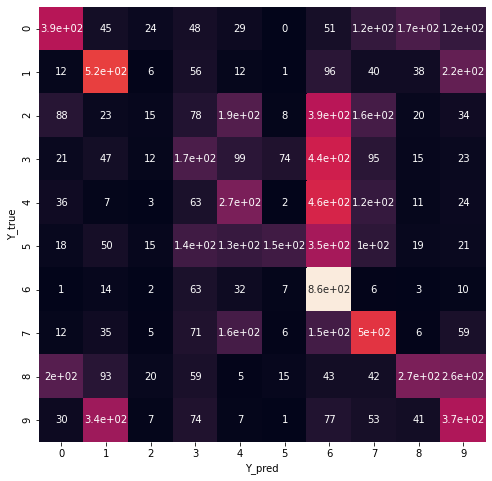

In [84]:
# confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False)
plt.xlabel('Y_pred')
plt.ylabel('Y_true')

In [85]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43      1000
           1       0.44      0.52      0.48      1000
           2       0.14      0.01      0.03      1000
           3       0.21      0.17      0.19      1000
           4       0.29      0.27      0.28      1000
           5       0.56      0.15      0.23      1000
           6       0.29      0.86      0.44      1000
           7       0.40      0.49      0.44      1000
           8       0.45      0.27      0.34      1000
           9       0.32      0.37      0.35      1000

    accuracy                           0.35     10000
   macro avg       0.36      0.35      0.32     10000
weighted avg       0.36      0.35      0.32     10000



# CNN implementation

In [98]:
CNN = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3), input_shape = (32,32,3), activation = 'relu'), # filtering with Relu
    keras.layers.MaxPooling2D((2,2)), # max Pooling with a 2x2 matrix
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu'), # has 32 3x3 filters
    keras.layers.MaxPooling2D((2,2)),
    
    
    # ann
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

CNN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [99]:
CNN.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9196 - accuracy: 0.26930s - loss: 1.925
Epoch 2/50
1563/1563 [==============================] - 24s 16ms/step - loss: 1.6271 - accuracy: 0.4003
Epoch 3/50
1563/1563 [==============================] - 24s 16ms/step - loss: 1.5164 - accuracy: 0.4488
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4435 - accuracy: 0.4811
Epoch 5/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3921 - accuracy: 0.50352s - loss: - E
Epoch 6/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3461 - accuracy: 0.5220
Epoch 7/50
1563/1563 [==============================] - 34s 21ms/step - loss: 1.3180 - accuracy: 0.5361
Epoch 8/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2786 - accuracy: 0.5513
Epoch 9/50
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2621 - accuracy: 0.5589
Epoch 10/50
1563/1563 [===========

In [100]:
CNN.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.9668 - accuracy: 0.6807


[0.9667739272117615, 0.6807000041007996]

In [101]:
y_pred = CNN.predict(x_test)
y_pred = np.array([np.argmax(i) for i in y_pred])

Text(51.0, 0.5, 'Y_true')

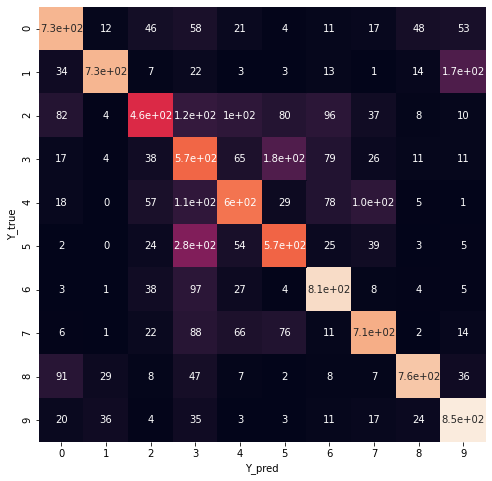

In [102]:
# confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cbar=False)
plt.xlabel('Y_pred')
plt.ylabel('Y_true')

In [103]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.89      0.73      0.80      1000
           2       0.66      0.46      0.54      1000
           3       0.40      0.57      0.47      1000
           4       0.63      0.60      0.62      1000
           5       0.60      0.57      0.59      1000
           6       0.71      0.81      0.76      1000
           7       0.74      0.71      0.72      1000
           8       0.87      0.77      0.81      1000
           9       0.73      0.85      0.79      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



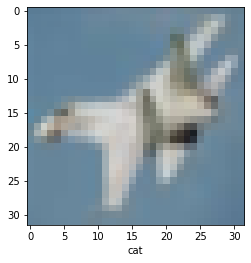

In [113]:
def show_image2(df,label,i):
    plt.imshow(df[i])
    plt.xlabel(labels[label[i]])
    plt.show()

show_image2(x_test,y_pred,10)

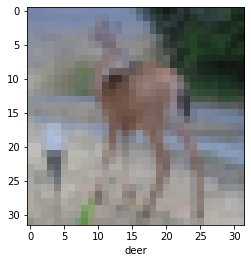

In [114]:
show_image2(x_test,y_pred,100)

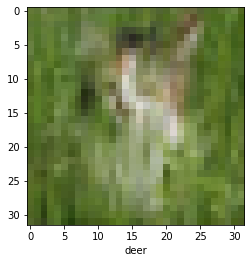

In [115]:
show_image2(x_test,y_pred,456)

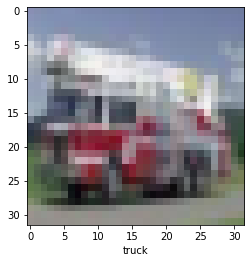

In [116]:
show_image2(x_test,y_pred,89)